# **Scenario**
Your team is analyzing a fine-tuned BERT model for sentiment analysis. To explain its decision-making process to stakeholders, you need to visualize attention weights for specific input sentences.

# **Objectives**
Extract attention weights from a pretrained Hugging Face transformer model.
Create heatmaps to visualize attention patterns for different input sentences.
Interpret how attention heads focus on relevant tokens.
# **Instructions**
**Load a pretrained model:** Use Hugging Face’s transformers library to load a BERT model (e.g., bert-base-uncased) and its tokenizer.

**Prepare input sentences:** Tokenize 2-3 sentences (e.g., "The movie was great" and "The plot was confusing") and convert them to input IDs and attention masks.

**Extract attention weights:** Modify the model to return attention weights. Pass the tokenized input through the model and collect attention matrices from all layers and heads.

**Visualize attention:** Use matplotlib or seaborn to plot heatmaps for each layer/head. Highlight how specific heads attend to [CLS], [SEP], or key tokens (e.g., "great" vs. "confusing").

**Analyze patterns:** Compare attention maps across layers. For example, early layers may focus on local dependencies, while deeper layers capture long-range relationships.

# **Evaluation Criteria**
Correct extraction and reshaping of attention weights.
Clear, labeled visualizations for multiple sentences.
Insightful interpretation of attention patterns.

In [1]:
pip install transformers tensorflow matplotlib seaborn

In [7]:
from transformers import TFBertModel , BertTokenizer
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import TFBertModel, BertTokenizer
import tensorflow as tf

# Load model with attentions enabled
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertModel.from_pretrained("bert-base-uncased", output_attentions=True)


sentences = ["The movie was great", "The plot was confusing"]

# Tokenize and encode
inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="tf", return_attention_mask=True)
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]

# Get token strings for plotting
tokens = [tokenizer.convert_ids_to_tokens(ids.numpy()) for ids in input_ids]

# Forward pass
outputs = model(input_ids, attention_mask=attention_mask)

# Extract attention weights
attentions = outputs.attentions 




Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

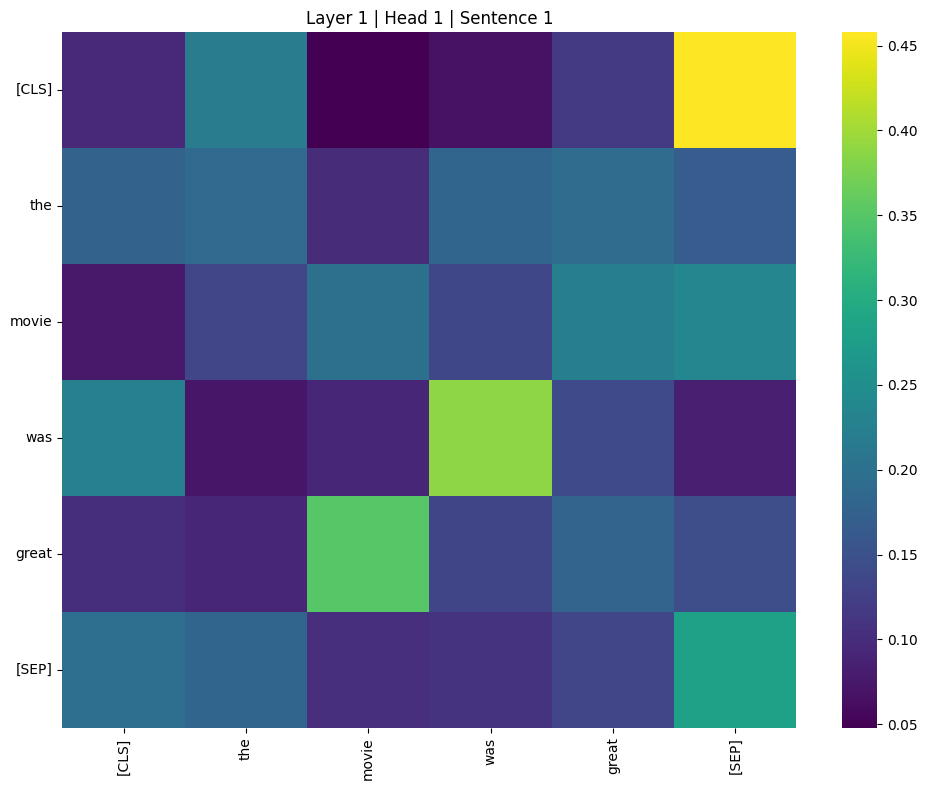

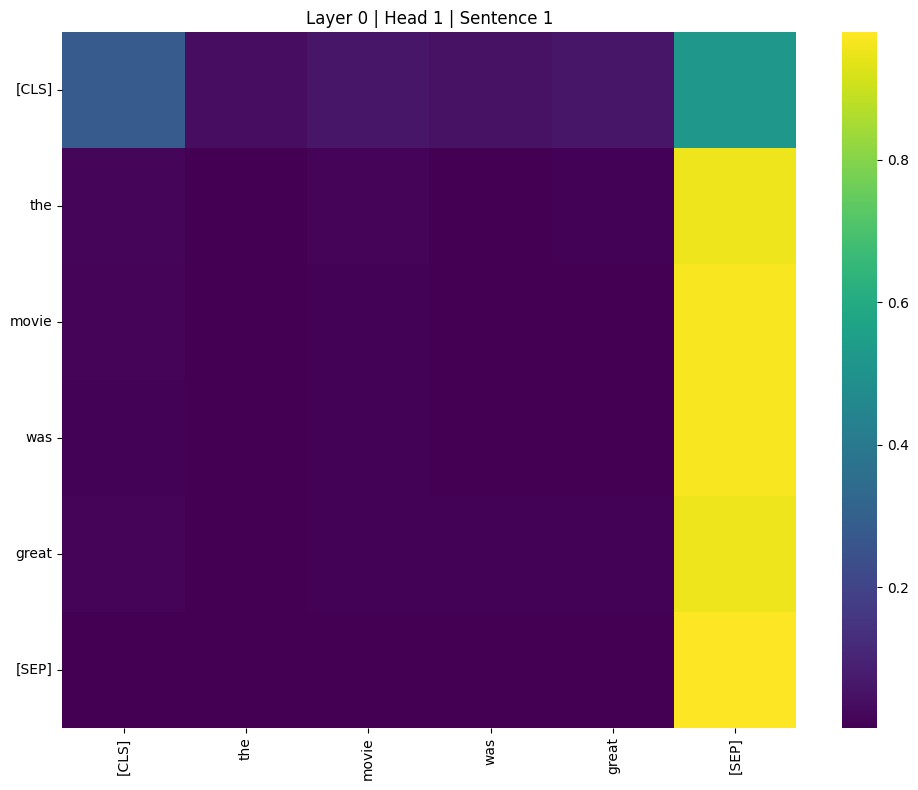

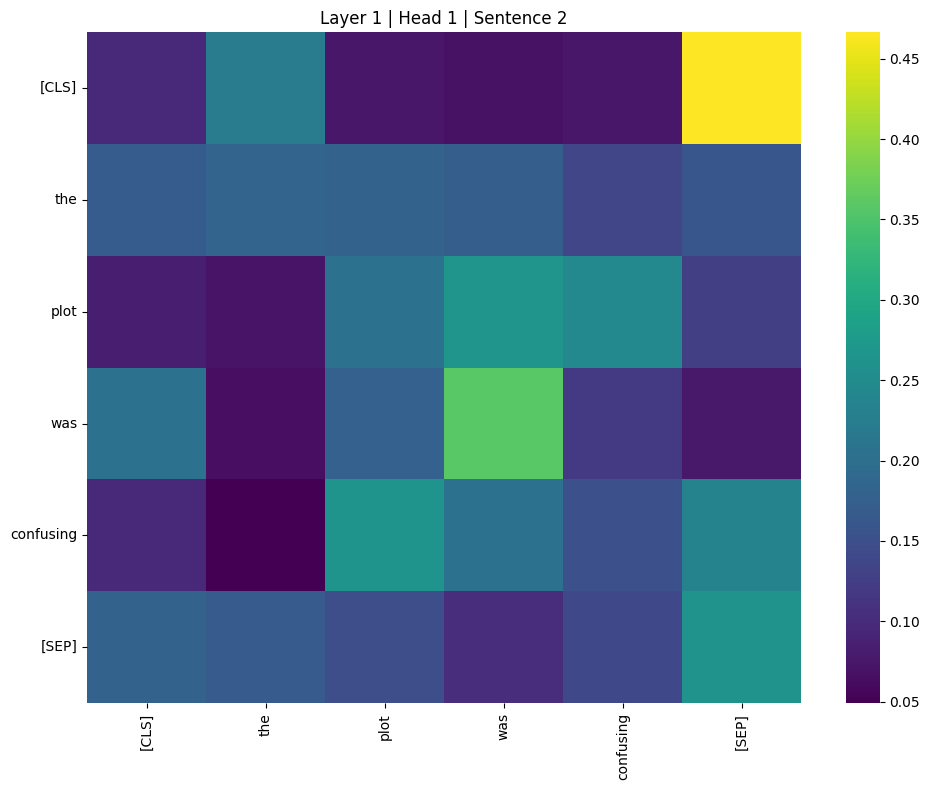

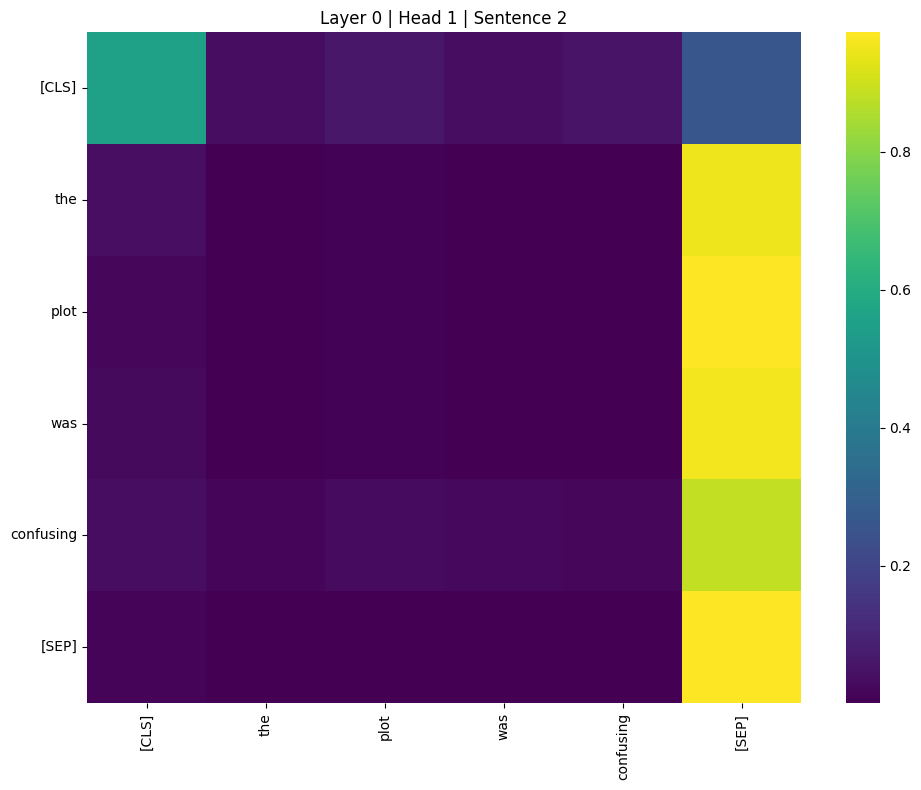

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_attention(attn_matrix, tokens, layer, head, sentence_index):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attn_matrix, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
    plt.title(f"Layer {layer+1} | Head {head+1} | Sentence {sentence_index+1}")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Visualize attention for one head in first and last layers
for sentence_index, sentence_tokens in enumerate(tokens):
    for layer in [0, -1]:  # first and last layers
        for head in [0]:  # first head
            attn_matrix = attentions[layer][sentence_index][head].numpy()
            plot_attention(attn_matrix, sentence_tokens, layer, head, sentence_index)
